## Transaction data (mini-project)

**Importing dataset from a csv-file in the working directory**

In [7]:
import pandas as pd

df = pd.read_csv('transaction_data.csv')

df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


**Checking number of rows and columns in the dataset**

In [8]:
df.shape

(5315, 3)

**Checking column names**

In [9]:
df.columns

Index(['date', 'name', 'transaction'], dtype='object')

**Dataset columns comments:**
* date – time and date range (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – customer name
* transaction – transaction status

**Checking columns data types**

In [10]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

**Checking descriptive statistics**

In [11]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


**Checking number of missing values (NaN)**

In [12]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

**Check transactions types we have in the dataset**

In [13]:
transaction_type = df['transaction'].value_counts()

transaction_type

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

**Plot transactions types count values**

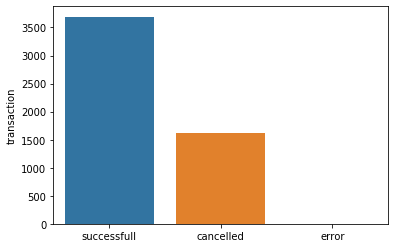

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


ax = sns.barplot(x=df['transaction'].value_counts().index, y=transaction_type)

**Plotting in logarithmic scale (to better render error values on the histogram)**

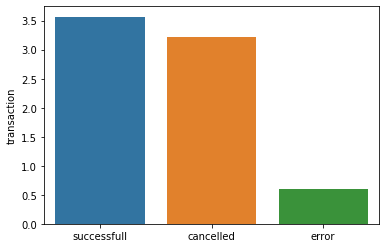

In [15]:
import numpy as np

ax = sns.barplot(x=df['transaction'].value_counts().index, y=np.log10(transaction_type))

**Count number of successful transactions for every user**

In [32]:
succesful_tr = df.query('transaction == "successfull"') \
    .groupby(['name'], as_index=False) \
    .agg({'date': 'nunique'}) \
    .sort_values('date', ascending=False) \
    .rename(columns={'date': 'successful_transactions'})


succesful_tr.head()

,name,successful_transactions
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78


**Check successful transactions descriptive statistics**

In [17]:
succesful_tr.describe()

,successful_transactions
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


**Plot successful transactions distribution**

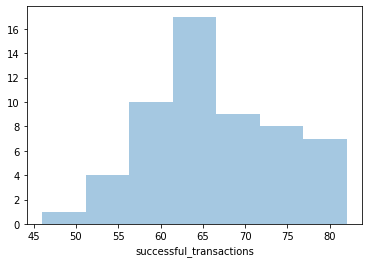

In [18]:
ax = sns.distplot(succesful_tr.successful_transactions, kde=False)

**You have an updated dataset with a new column Minute**

In [ ]:
# minute column containes number of minutes passed from the start of the day

In [20]:
# loading a new dataset
new_df = pd.read_csv('transaction_data_updated.csv')

new_df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [21]:
# limitting number of rows to dispaly
pd.set_option('display.max_rows', 21)

**Create a pivot table where index='minute', columns='name', values='number of transactions'. Fill missing values with zeroes**

In [22]:
user_vs_minute_pivot = new_df\
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'transaction': 'count'}) \
    .pivot(index='minute', columns='name', values='transaction') \
    .fillna(0)

user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.0,0.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
56,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,2.0,3.0
57,1.0,1.0,2.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0


**Graph amount of transactions VS minutes passed from the start of the day**

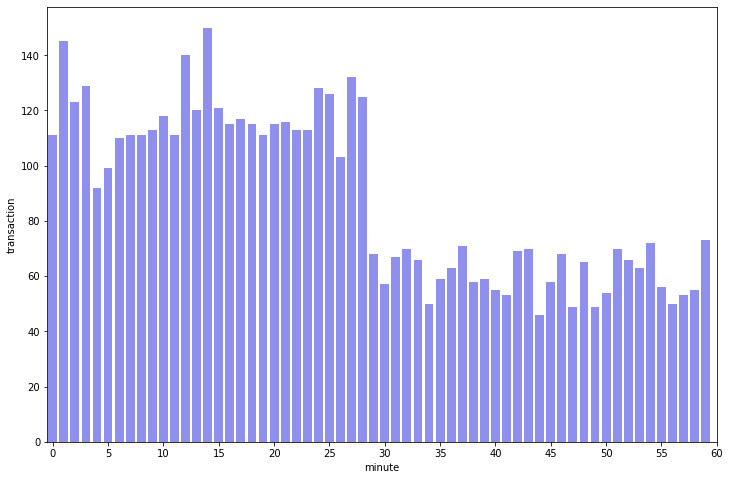

In [23]:
transaction_number = new_df.groupby(['minute'], as_index=False) \
    .agg({'transaction': 'count'})

ticks = [num for num in range(0, 65, 5)]  # creating ticks for x-axis
plt.figure(figsize=(12, 8))  # increasing figure size
sns.barplot(data=transaction_number, x='minute', y='transaction', color='blue', alpha=0.5)
plt.xticks(ticks=ticks, labels=ticks);

In [24]:
# The hystogram looks odd. Seems that data has a mistake: 
# the amount of transactions in the 0-30 minutes range 
# is ~ twice the number of transactions in the 31-59 minutes range.

**Let's investigate our dataset and find causes of the hystogram looking odd**

In [26]:
# checking the start time of our data
new_df.date.min()

'2020-03-02 00:00:00'

In [27]:
# checking the end time of our data
new_df.date.max()

'2020-03-02 01:29:05'

In [28]:
# We can see that the data contains 90 minutes range, meaning that the dataframe
# has an error estimate of minutes. Minutes 0-30 include also transactions from 
# 60-90 minutes time interval. That's why we can see twice amount of transactions there.

**Correcting the error we've just found**

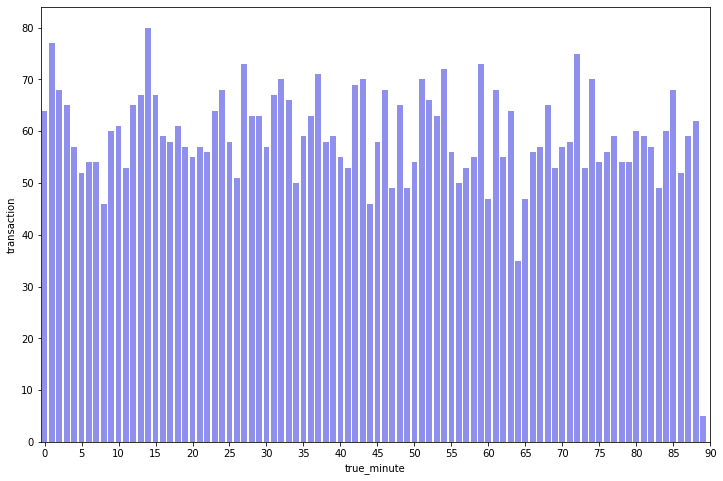

In [29]:
# at first, we convert date to datetime format
new_df['date'] = pd.to_datetime(new_df.date)

# then we calculate properly minutes passed from the start of a day
new_df['true_minute'] = new_df.date.dt.minute + (60 * new_df.date.dt.hour)

# finally, let's build an updated graph
transaction_number = new_df.groupby(['true_minute'], as_index=False) \
    .agg({'transaction': 'count'})

ticks = [num for num in range(0, 95, 5)]
plt.figure(figsize=(12, 8))
sns.barplot(data=transaction_number, x='true_minute', y='transaction', color='blue', alpha=0.5)
plt.xticks(ticks=ticks, labels=ticks);

# now we can see that transactions are distributed properly over the investigated time period